In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
from game import Game
from functions import *
import json

In [2]:
params = {
    'T': 1.5,
    'R': 1,
    'S': 0,
    'P': 0.3,
    'L': 0.4,
    'noise':0.001
}

Ts = np.linspace(1.1, 1.9, 9)
result_alpha_eps = alpha_eps(Ts, params, iterations=10)

timestr = time.strftime("%Y%m%d-%H%M%S")
name_alpha_eps = 'alpha_eps-'+timestr

np.save('data/'+name_alpha_eps, result_alpha_eps)
with open('data/'+name_alpha_eps+'.json', 'w', encoding ='utf8') as json_file:
    json.dump(params, json_file, ensure_ascii = False)

KeyboardInterrupt: 

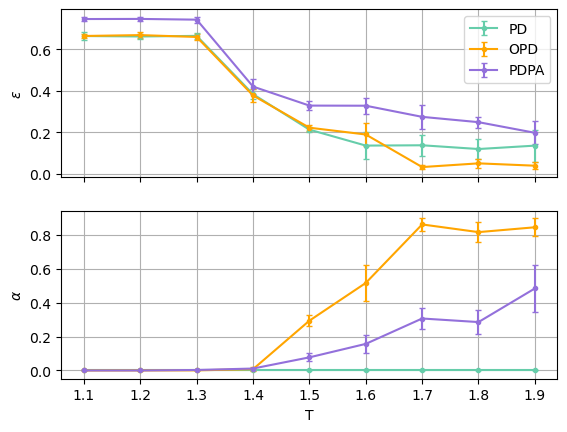

In [27]:
name_alpha_eps = 'alpha_eps-20230606-125503'
games = np.load('data/'+name_file+'.npy')

fig = plt.figure()
axs = fig.subplots(2,1)

colors = ['mediumaquamarine', 'orange', 'mediumpurple']
names = ['PD', 'OPD', 'PDPA']
for game, color, name in zip(games, colors, names):
        axs[0].errorbar(game[-1], game[0], game[1], color=color, label=name, capsize=2, marker='.')
        axs[1].errorbar(game[-1], game[2], game[3], color=color, label=name, capsize=2, marker='.')

axs[1].set_xlabel('T')
axs[1].set_ylabel(r'$\alpha$')
axs[0].set_ylabel(r'$\epsilon$')
axs[0].legend()
axs[0].grid()
axs[1].grid()
axs[0].set_xticklabels([])

fig.savefig('plots/'+name_alpha_eps+'.pdf')
with open('plots/'+name_alpha_eps+'.json', 'w', encoding ='utf8') as json_file:
    json.dump(params, json_file, ensure_ascii = False)

In [8]:
params = {
    'T': 1.4,
    'R': 1,
    'S': 0,
    'P': 0.3,
    'L': 0.4,
    'noise':0.001
}

result_correlation = correlation(params, iterations=50)

timestr = time.strftime("%Y%m%d-%H%M%S")
name_corr = 'correlation-'+timestr

np.save('data/'+name_corr, result_correlation)
with open('data/'+name_corr+'.json', 'w', encoding ='utf8') as json_file:
    json.dump(params, json_file, ensure_ascii = False)

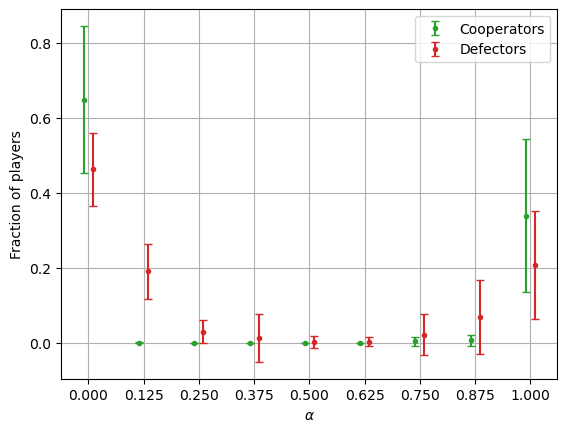

In [13]:
name_file = name_corr
a = np.load('data/'+name_file+'.npy')

fig = plt.figure()
ax = fig.add_subplot()

ax.errorbar(a[-1]-0.01, a[2], a[3], linestyle='', marker='.', color='tab:green', label='Cooperators', capsize=3)
ax.errorbar(a[-1]+0.01, a[0], a[1], linestyle='', marker='.', color='tab:red', label='Defectors', capsize=3)
ax.legend()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Fraction of players')
ax.set_xticks(a[-1])
ax.grid()

fig.savefig('plots/'+name_file+'.pdf')
with open('plots/'+name_corr+'.json', 'w', encoding ='utf8') as json_file:
    json.dump(params, json_file, ensure_ascii = False)